In [9]:
#Import libraries
import matplotlib
import matplotlib.pyplot as plt
from netCDF4 import Dataset as NCF
import numpy as np
import os
import requests
import sys
import tarfile

In [ ]:
downloadData = True

# Path to data
dataDir = "../Data/" 

In [3]:
# Create definitions
def read_atm_data(nc): #reads in atmPrf files
    alt = nc.variables['MSL_alt'][:] #reads in altitude array in km
    ba = nc.variables['Bend_ang'][:] #reads in bending angle array
    badFlag = nc.bad #0 = good, 1 = bad

    return alt, ba, badFlag

In [ ]:
if(downloadData == True):
    # Download data
    url = 'https://data.cosmic.ucar.edu/gnss-ro/cosmic2/nrt/level2/2023/060/atmPrf_nrt_2023_060.tar.gz'
    target_path = "../Data/atmPrf_nrt_2023_060.tar.gz"

    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(target_path, 'wb') as f:
            f.write(response.raw.read())


    ## Untar data

    # open file
    file = tarfile.open(target_path)

    # extract data from file
    file.extractall(dataDir)
    file.close()


In [4]:
# Choose one file to plot
fName = "atmPrf_C2E1.2023.060.01.36.G19_0001.0001_nc"
atmFile = dataDir + fName

# Filename info
fileType = fName[0:6]
const = fName[7:9]
fmNum = fName[10:11]
fYear = fName[12:16]
fDoy = fName[17:20]
fMin = fName[21:23]
fSec = fName[24:26]
timeStr = fName[12:26]

2023.060.01.36


In [ ]:
print(timeStr)

In [5]:
# Read in data from netCDF files
ncfAtm = NCF(atmFile,'r')
atmAlt, atmBa, atmBad = read_atm_data(ncfAtm)
ncfAtm.close()

In [ ]:
print(atmBad)

<IPython.core.display.Javascript object>


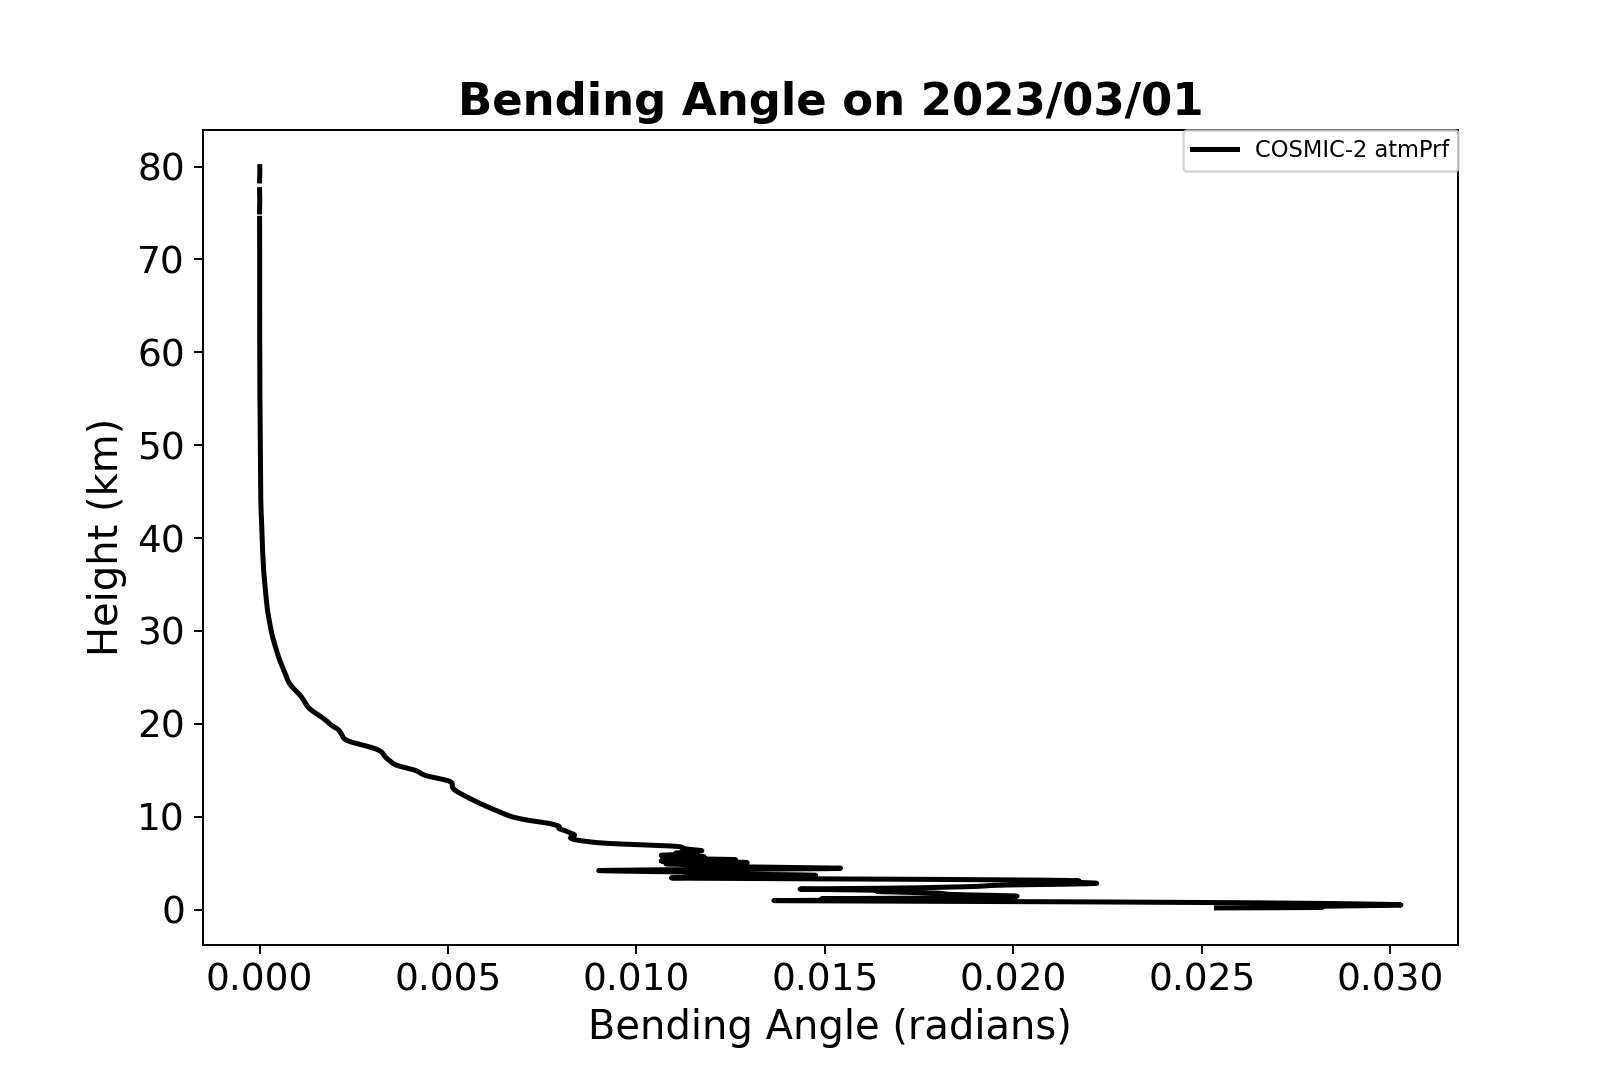

In [10]:
# Plot raw profiles
titleStr = "Bending Angle on 2023/03/01"
plt.rcParams.update({'font.size': 15}) # must set in top
plt.rcParams['figure.figsize'] = 9, 6 # width, height in inches
plt.plot(atmBa,atmAlt,linestyle='-',color='black',linewidth=2,label="COSMIC-2 atmPrf")
plt.xlabel("Bending Angle (radians)",fontsize = 16)
plt.ylabel("Height (km)",fontsize = 16)
plt.legend(loc=1, borderaxespad=0.,fontsize = 9) #adds legend
plt.title(titleStr,fontsize = 18,fontweight="bold") #adds plot title
plt.show()